In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
df = pd.read_csv('canada_per_capita_income.csv')

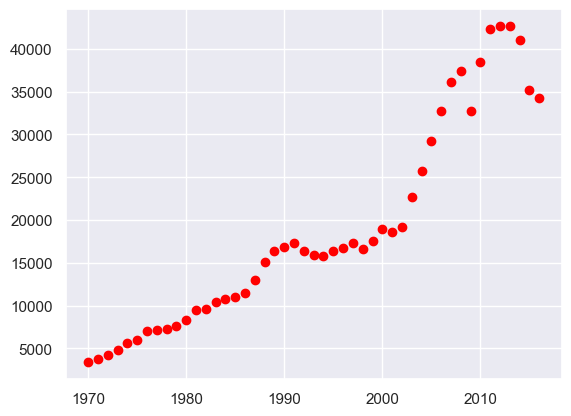

In [89]:
plt.scatter(df.year, df['per capita income (US$)'], color='red')
plt.show()

In [90]:
X = df[['year']]
y = df['per capita income (US$)']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
coeffient = model.coef_[0]
coeffient

805.2462675933376

In [94]:
intercept = model.intercept_
intercept

-1586063.9420333195

In [95]:
y_predict = model.predict(X_test)

In [96]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

mse

25971377.189248297

In [97]:
r2

0.8490886643427222

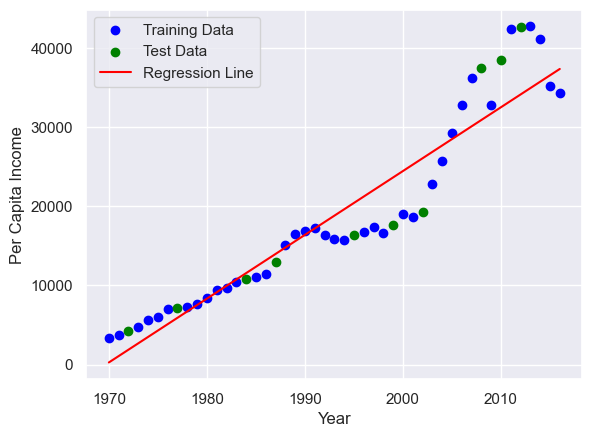

In [98]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.legend()
plt.show()

In [99]:
future_years = pd.DataFrame({'year': [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]})

future_predictions = model.predict(future_years)

In [100]:
data = pd.DataFrame(
    {
        'year': future_years['year'],
        'per capita income (US$)': future_predictions
    }
)
data

,year,per capita income (US$)
0,2017,38117.779702
1,2018,38923.025970
2,2019,39728.272238
3,2020,40533.518505
4,2021,41338.764773
5,2022,42144.011040
6,2023,42949.257308
7,2024,43754.503576


In [101]:
final_df = pd.concat([df, data], ignore_index=True)
final_df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


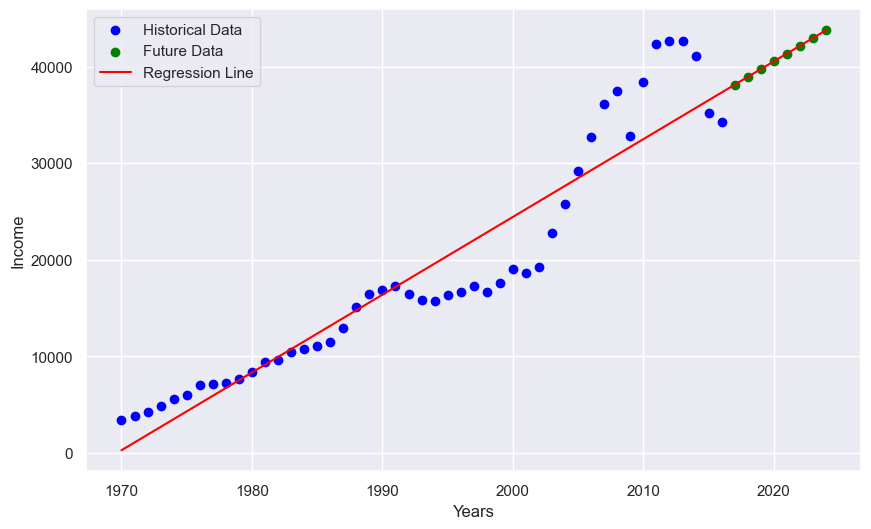

In [120]:
plt.figure(figsize=(10,6))
plt.scatter(df.year, df['per capita income (US$)'], color='blue', label='Historical Data')
plt.scatter(data.year, data['per capita income (US$)'], color='green', label='Future Data')
plt.plot(final_df.year, model.predict(final_df[['year']]) ,color='red', label='Regression Line')
plt.xlabel('Years')
plt.ylabel('Income')
plt.legend()
plt.show()